### Reading book

Text(0, 0.5, 'Number of unique words')

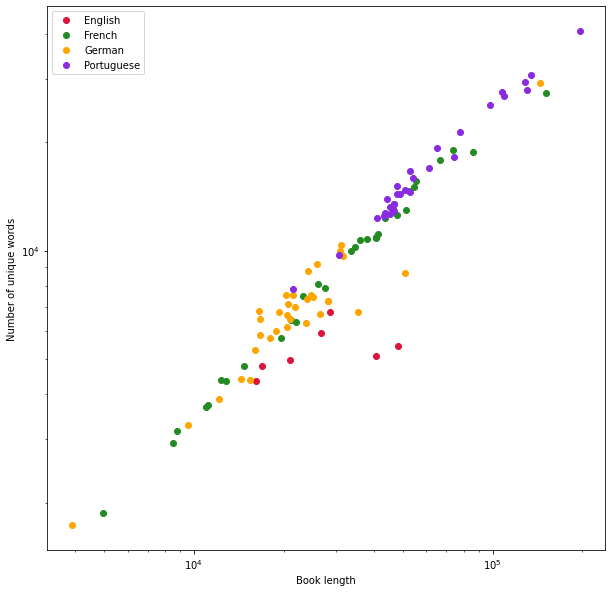

In [75]:
from collections import Counter
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_book(title_path):
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n","").replace("\r","")
    return text

def count_words_fast(text):
    text=text.lower()
    skips = [",", ".",":",";","'",'"']
    word_count = {}
    
    for ch in skips:
        text=text.replace(ch,"")
        
    word_count = Counter(text.split(" "))
    return word_count

def word_stats(word_counts):
    num_unique = len(word_counts)
    counts = word_counts.values()
    return num_unique, counts
    
#text = read_book("C:/Ajith/Acadamics/edx/Using python for research/Week 3/Language processing/Books/English/shakespeare/Romeo and Juliet.txt")
#word_counts = count_words_fast(text)        
#num_unique, counts = word_stats(word_counts)
#print("Number of unique words:",num_unique, "Total number of words:",sum(counts))

#text = read_book("C:/Ajith/Acadamics/edx/Using python for research/Week 3/Language processing/Books/German/shakespeare/Romeo und Julia.txt")
#word_counts = count_words_fast(text)        
#num_unique, counts = word_stats(word_counts)
#print("Number of unique words:",num_unique, "Total number of words:",sum(counts))

stats = pd.DataFrame(columns = ("Language","Author","Title","Length","Unique"))
title_num = 1
book_dir = "C:/Ajith/Acadamics/edx/Using python for research/Week 3/Language processing/Books"
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            word_counts = count_words_fast(text)        
            num_unique, counts = word_stats(word_counts)
            stats.loc[title_num] = language, author.capitalize(), title[:-4], sum(counts), num_unique
            title_num+=1
            #print(inputfile)
            #print("Number of unique words:",num_unique, "Total number of words:",sum(counts))

            
plt.figure(figsize=(10,10))
subset = stats[stats.Language=="English"]
plt.loglog(subset.Length, subset.Unique, "o", label = "English", color="crimson")
subset = stats[stats.Language=="French"]
plt.loglog(subset.Length, subset.Unique, "o", label = "French", color="forestgreen")
subset = stats[stats.Language=="German"]
plt.loglog(subset.Length, subset.Unique, "o", label = "German", color="orange")
subset = stats[stats.Language=="Portuguese"]
plt.loglog(subset.Length, subset.Unique, "o", label = "Portuguese", color="blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words")


### Directory handling

In [59]:
import os
book_dir = "C:/Ajith/Acadamics/edx/Using python for research/Week 3/Language processing/Books"
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            #print(inputfile)

### Word count

In [9]:
def count_words(text):
    text=text.lower()
    skips = [",", ".",":",";","'",'"']
    word_count = {}
    
    for ch in skips:
        text=text.replace(ch,"")
        
    for word in text.split(" "):
        if word in word_count:
            word_count[word]+=1
        else:
            word_count[word]=1
    return word_count

from collections import Counter

def count_words_fast(text):
    text=text.lower()
    skips = [",", ".",":",";","'",'"']
    word_count = {}
    
    for ch in skips:
        text=text.replace(ch,"")
        
    word_count = Counter(text.split(" "))
    return word_count

text ="This comprehension check is to check for comprehension."
print(count_words(text))

count_words(text) == count_words_fast(text)    

{'this': 1, 'comprehension': 2, 'check': 2, 'is': 1, 'to': 1, 'for': 1}


True

### Pandas examples

In [8]:
import pandas as pd

table = pd.DataFrame(columns = ("Name","Age"))
table.loc[1] = "Keerthi",22
table.loc[2] = "Muthu",58
table.loc[3] = "Arun",24

table


,Name,Age
1,Keerthi,22
2,Muthu,58
3,Arun,24
